<a href="https://colab.research.google.com/github/Urvi1006/tables/blob/new/Easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
-!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 38.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
# Run OCR on the cropped images
import easyocr
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

def find_squares(img, threshold):
    img = cv.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv.Canny(gray, 0, 50, apertureSize=5)
                bin = cv.dilate(bin, None)
            else:
                _retval, bin = cv.threshold(gray, thrs, 255, cv.THRESH_BINARY)
            contours, _hierarchy = cv.findContours(bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv.arcLength(cnt, True)
                cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv.contourArea(cnt) > 1000 and cv.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    if max_cos < threshold:
                        squares.append(cnt)
    return squares

In [ ]:

from google.colab.patches import cv2_imshow
import cv2

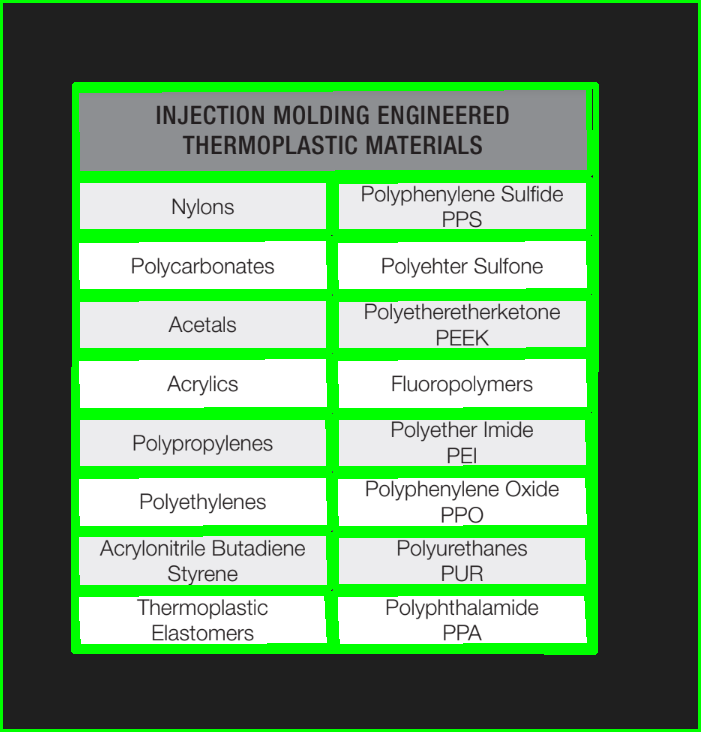

303


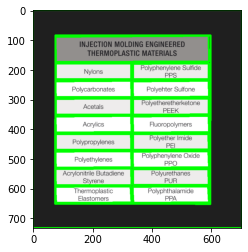

In [ ]:
image_address = "/content/next.PNG"
image = cv2.imread("/content/next.PNG")

squares = find_squares(image, 0.1)
cv2.drawContours(image, squares, -1, (0,255,0),3)
cv2_imshow(image)

print(len(squares))
# show the image
plt.imshow(image)
plt.show()

[0, 74, 333]
[0, 84, 178, 237, 296, 355, 414, 474, 532, 592]
[(74, 84), (74, 178), (74, 237), (74, 296), (74, 355), (74, 414), (74, 474), (74, 532), (74, 592)]


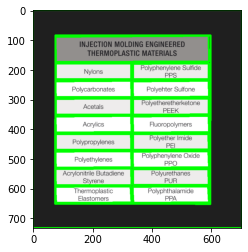

In [ ]:
threshold_x, threshold_y = 30, 50
# find the top x coords of all the columns; where do they begin
top_x = []
for i in squares:
    top_x.append(i[0][0])
# print(sorted(top_x))
top_x = np.unique(top_x)

x_bins = [top_x[0]]
for i in top_x:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - x_bins[-1] > threshold_x:
        x_bins.append(i)

# find the top y coords of all the columns; where do they begin

top_y = []
for i in squares:
    top_y.append(i[0][1])
# print(sorted(top_y))
top_y = np.unique(top_y)

y_bins = [top_y[0]]
for i in top_y:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - y_bins[-1] > threshold_y:
        y_bins.append(i)

print(x_bins)
print(y_bins)
plt.imshow(image)

# make pairs of top coords
top_cords = []
for i in x_bins[1:-1]:
    for j in y_bins[1:]:
        top_cords.append((i,j))
print(top_cords)

In [ ]:
print(top_y)

[  0  84  85  86  87  88  90 178 179 180 181 237 238 239 240 296 297 298
 299 355 356 357 358 414 415 416 417 474 475 476 532 533 534 535 592 593
 594]


In [ ]:
threshold_x, threshold_y = 10, 10

# find the bottom x coords of all the columns; where do they end
top_x = []
for i in squares:
    top_x.append(i[2][0])
# print(sorted(top_x))
top_x = np.unique(top_x)

x_bins = [top_x[0]]
for i in top_x:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - x_bins[-1] > threshold_x:
        x_bins.append(i)

# find the bottom y coords of all the columns; where do they end

top_y = []
for i in squares:
    top_y.append(i[2][1])
# print(sorted(top_y))
top_y = np.unique(top_y)

y_bins = [top_y[0]]
for i in top_y:
    # get the optimal bin value
    # distance b/w x_cords of two cols should be at least 50 units
    if i - y_bins[-1] > threshold_y:
        y_bins.append(i)

# print(x_bins)
# print(y_bins)

# make pairs of bottom coords
bottom_cords = []
for i in x_bins[1:]:
    if i != 0:
        for j in y_bins[:-1]:
            if j != 0:
                bottom_cords.append((i,j))
print(len(bottom_cords))

18


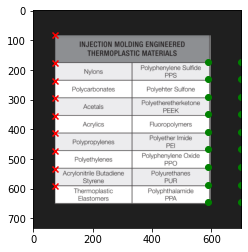

In [ ]:
im = plt.imread(image_address)
implot = plt.imshow(im)

for i in top_cords:
    plt.scatter([i[0]], [i[1]], marker='x', c='r')
for i in bottom_cords:
    plt.scatter([i[0]], [i[1]], marker='o', c='g')
plt.show()

In [ ]:
x_bins

[328, 588, 700]

In [ ]:
from PIL import Image
  
# Opens a image in RGB mode
im = Image.open(image_address)

# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size

def crop_image(squares, padding=[0,0,0,0]):
    # top, right, bottom, left
    
    # Setting the points for cropped image
    left, top = squares[0][0]-padding[3], squares[0][1]-padding[0]
    right, bottom = squares[1][0]+padding[1], squares[1][1]+padding[2]
    
    # Cropped image of above dimension
    # (It will not change orginal image)
    im1 = im.crop((left, top, right, bottom))

    filename = './table3' + str(i) + '.png'
    im1.save(filename)
    
    return filename
    
    # Shows the image in image viewer
    im1.imshow()

In [ ]:
# create crops
all_cords = list(zip(top_cords, bottom_cords))
print(len(all_cords))

9


In [ ]:
for i in range(len(all_cords)):
    crop_image(all_cords[i], padding=[2,2,2,2])

In [ ]:
# create rows with all columns to create html/md output
nrows = len(y_bins) - 1 # remove the first y_bin cuz it's at the edge
ncols = len(x_bins) - 2 # remove first and last x_bins cuz they're at edges

square_rows = []
index_rows = []
text_rows = []
for i in range(nrows):
    square_rows.append([])
    index_rows.append([])
    text_rows.append([])
    
for i in range(len(all_cords)):
    rownum = i%nrows
    square_rows[rownum].append(all_cords[i])
    index_rows[rownum].append(i)
    text_rows[rownum].append(i)

In [ ]:
for i in range(len(index_rows)):
    row = index_rows[i]
    for j in range(len(row)):
        cell = row[j]
        crop = './table3' + str(cell) + '.png'
        result = reader.readtext(crop, detail=0)
        result = ' '.join(result)
        text_rows[i][j] = result

from pprint import pprint as pp
pp(text_rows)

[['INJECTION MOLDING ENGINEERED THERMOPLASTIC MATERIALS'],
 ['Polyphenylene Sulfide Nylons PPS'],
 ['Polycarbonates Polyehter Sulfone'],
 ['Polyetheretherketone Acetals PEEK'],
 ['Acrylics Fluoropolymers'],
 ['Polyether Imide Polypropylenes PEI'],
 ['Polyphenylene Oxide Polyethylenes PPO'],
 ['Acrylonitrile Butadiene Polyurethanes Styrene PUR'],
 ['Thermoplastic Polyphthalamide Elastomers PPA']]


In [ ]:
def html_output():
    # html output
    html = '''<html><body><table>'''
    colnum = 0

    for row in index_rows:
        html_row = '''<tr>'''
        for cell in row:
            crop = './table3' + str(cell) + '.png'
            result = reader.readtext(crop, detail=0)
            result = ' '.join(result)
            html_cell = '<td>' + result + '</td>'
            html_row += html_cell
        html_row += '</tr>'
        html += html_row

    html += '</table></body></html>'
    with open('./result.html', 'w+') as f:
        f.write(html)

In [ ]:
def md_output(header=True):
    # markdown output
    md = ''
    colnum = 0

    for i in range(len(index_rows)):
        row = index_rows[i]
        md_row = '|'
        for cell in row:
            crop = './table3' + str(cell) + '.png'
            result = reader.readtext(crop, detail=0)
            result = ' '.join(result)
            md_row += result + '|'
        md += md_row + '\n'
        if i == 0:
            md += '|--' * (ncols) 
            md += '|\n'

    with open('./result.md', 'w+') as f:
        f.write(md)

In [ ]:
html_output()